In [6]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt

In [8]:
faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/apple/scikit_learn_data


In [10]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [16]:
print(faces['images'][0].round(2))

[[0.31 0.37 0.42 ... 0.37 0.33 0.31]
 [0.34 0.4  0.44 ... 0.37 0.34 0.31]
 [0.34 0.42 0.45 ... 0.38 0.34 0.3 ]
 ...
 [0.21 0.21 0.22 ... 0.15 0.17 0.17]
 [0.2  0.21 0.21 ... 0.15 0.16 0.17]
 [0.2  0.21 0.2  ... 0.15 0.16 0.16]]


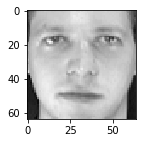

In [19]:
img = faces['images'][0]
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray)

In [20]:
n_sample = 60
Xn = faces['images'][:n_sample]
Xn.shape

(60, 64, 64)

In [21]:
X = Xn.reshape(n_sample, -1)
X.shape

(60, 4096)

In [22]:
y = faces['target'][:n_sample]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
X_train.shape, X_test.shape

((45, 4096), (15, 4096))

In [27]:
from sklearn import svm
model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
y_pred = model.predict(X_test)
y_pred[:]

array([3, 0, 4, 5, 2, 4, 0, 2, 5, 3, 0, 3, 4, 2, 0])

In [29]:
y_test[:]

array([3, 0, 4, 5, 2, 4, 3, 2, 4, 3, 0, 3, 4, 2, 0])

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [31]:
print('Accuracy Score {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy Score 0.8667


In [38]:
class_names = ['Alex', 'Cala', 'Dana', 'Eva', 'Fox']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        Alex       0.75      1.00      0.86         3
        Cala       1.00      1.00      1.00         3
        Dana       1.00      0.75      0.86         4
         Eva       1.00      0.75      0.86         4
         Fox       0.50      1.00      0.67         1

    accuracy                           0.87        15
   macro avg       0.85      0.90      0.85        15
weighted avg       0.92      0.87      0.87        15



In [39]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3 0 0 0 0]
 [0 3 0 0 0]
 [1 0 3 0 0]
 [0 0 0 3 1]
 [0 0 0 0 1]]


In [34]:
import seaborn as sb

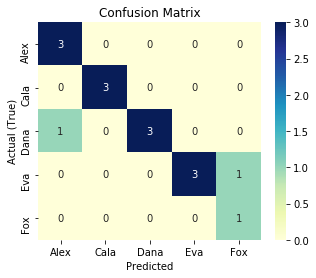

In [42]:
ax = plt.subplot()

plt.rcParams['figure.figsize'] = 5, 4
plt.rcParams.update({'font.size': 10})

sb.heatmap(cm, annot=True, ax=ax, cmap='YlGnBu')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual (True)')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()